# Prediction of Bike rental count

Using regression, a model will be build that will predict how many people will rent a bike in a certain hour of a day.


## Background 


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

## Data Set

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

## Dataset characteristics
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [1]:
# import necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data and view it for a whole day
bikes = pd.read_csv("bike_regression/hour.csv")

bikes.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
#Getting the shape of dataset with rows and columns
print(" rows ,columns")
print(bikes.shape)

 rows ,columns
(17379, 17)


In [4]:
#check details about the data set
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Preprocessing the dataset

In [5]:
#check if data contains empty cells
bikes.isnull().sum().sort_values(ascending=False)/bikes.shape[0]

instant       0.0
weathersit    0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
workingday    0.0
dteday        0.0
weekday       0.0
holiday       0.0
hr            0.0
mnth          0.0
yr            0.0
season        0.0
cnt           0.0
dtype: float64

No Data missing: No work required here.

In [6]:
#Checking for Duplicates
value=len(bikes[bikes.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


No duplicates: No work required here.

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We can see that season, year, month, hour, holiday, weekday, workingday and weatherid are saved as integers. While we are preproccesing the data, we will change their type to 'category' to allow easier working

In [8]:
#Change the int64 column into catagory column
cols=['season','yr','mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cols:
  bikes[col]=bikes[col].astype('category')

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


## Final preprocessing step: Removing unnecessary categories.

The dataset contains instant, which is simply just an ID and doesn't effect the outcome. It also has dteday, which is the date in a readable format, but useless to us. Since the data already exists split in yr, mnth and weekday, we can simply drop it. As we only care for the total number of users to predict how many bikes we need, we can drop casual and registered as they only differantiate the total amount of users.

In [10]:
#drop unnecessary categories

bikes = bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


# Data Analysis Of The Data Set

##  categorical variables:

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

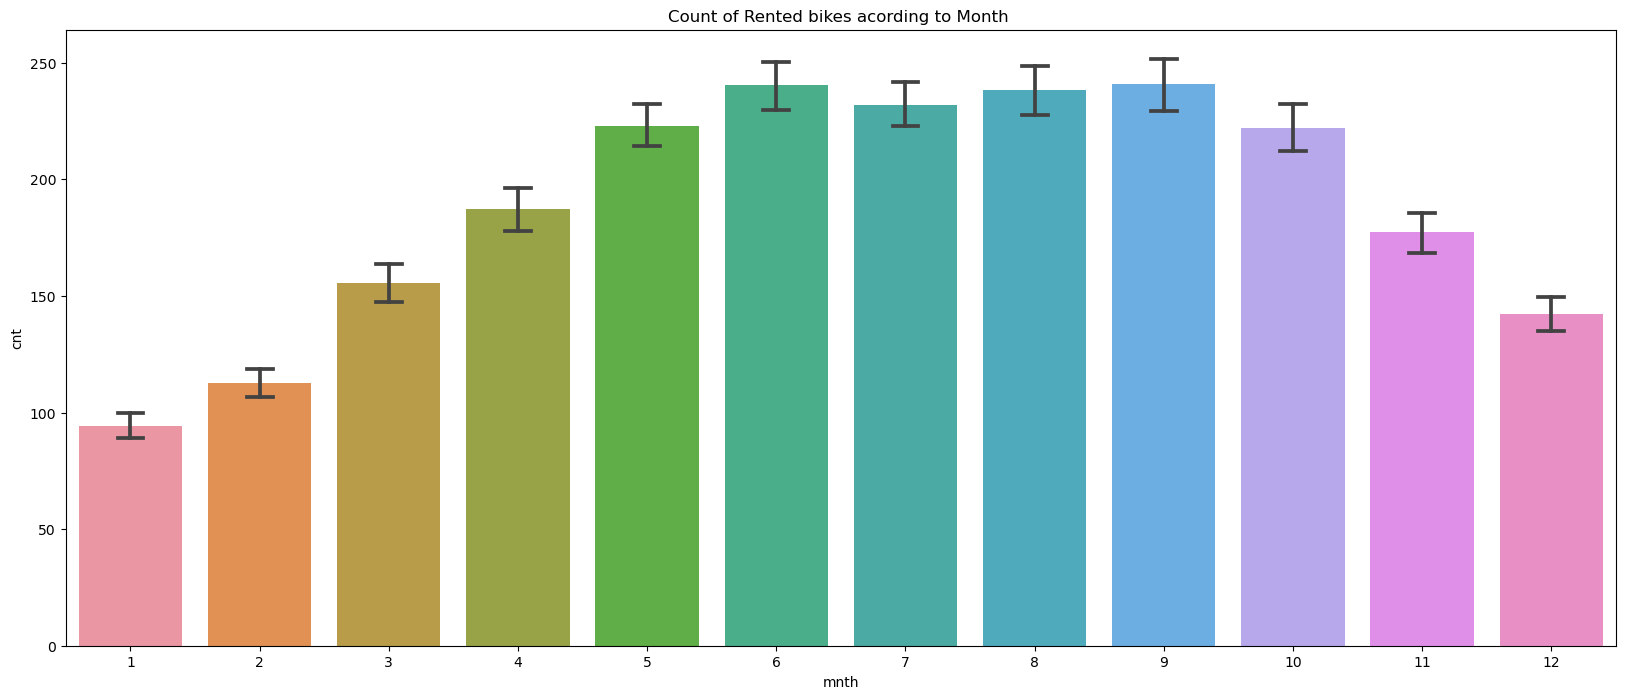

In [11]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bikes,x='mnth',y='cnt',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

* Most bikes are rented in the summer, the peak lasting between may and october

[Text(0.5, 1.0, 'Count of Rented bikes acording to hour')]

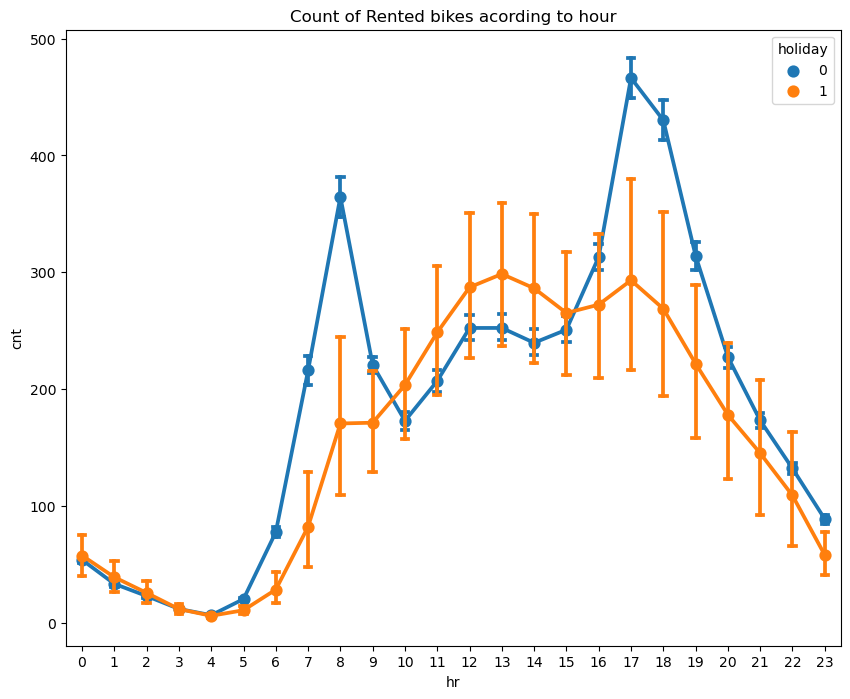

In [12]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=bikes,x='hr',y='cnt',hue='holiday',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to hour')

Peaks of rentend bike are at 8am and 5 and 6pm. Most likely the times most people travel from and to work.
During Holidays, the peak is around 1pm and the curve is a lot flatter, but has a lot more variation

[Text(0.5, 1.0, 'Count of Rented bikes acording to season')]

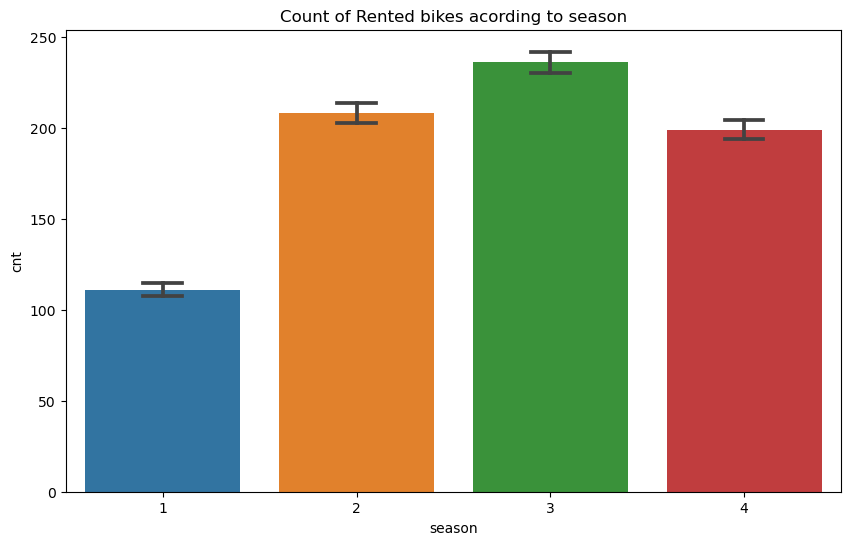

In [13]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bikes,x='season',y='cnt',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to season')

Winter sees a much smaller bikeusage compared to the other seasons.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekday')]

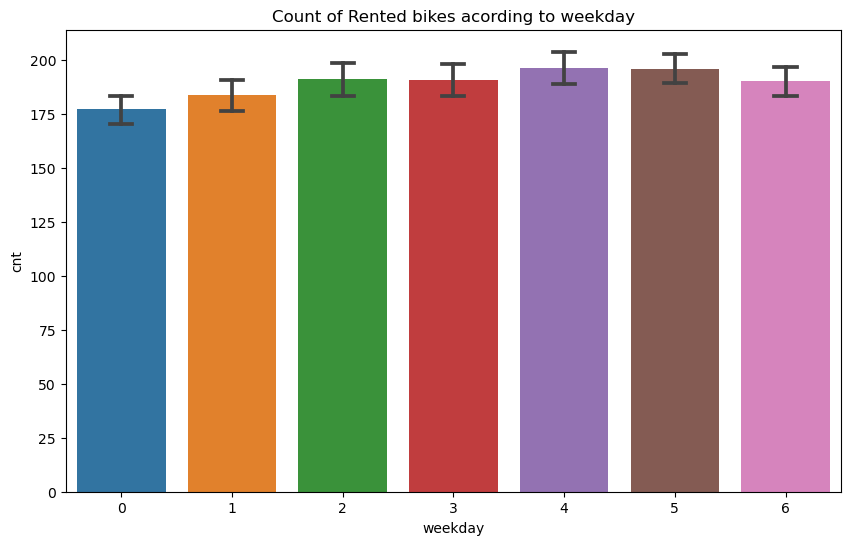

In [14]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=bikes,x='weekday',y='cnt',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekday')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weather')]

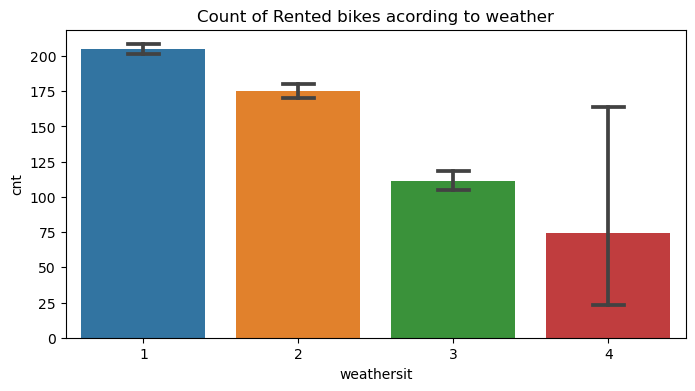

In [15]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=bikes,x='weathersit',y='cnt',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weather')

## Numerical Data analysis:

In [16]:
#assign the numerical coulmn to variable
numerical_columns=list(bikes.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

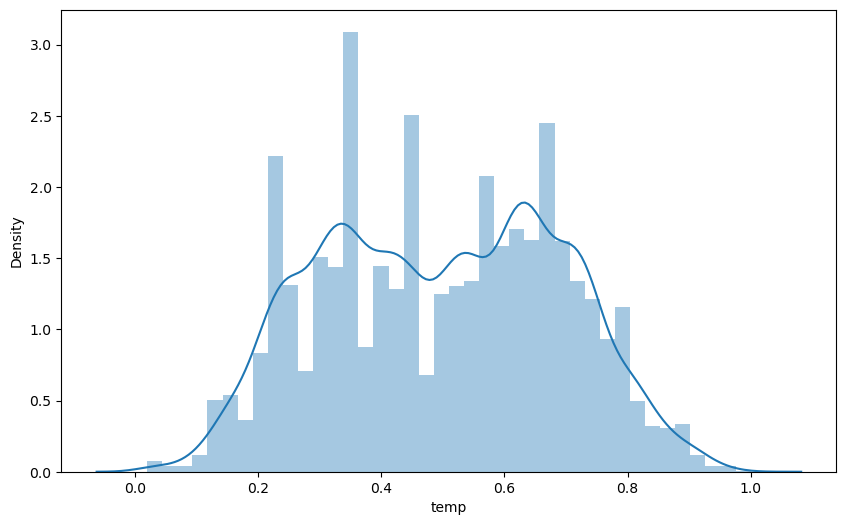

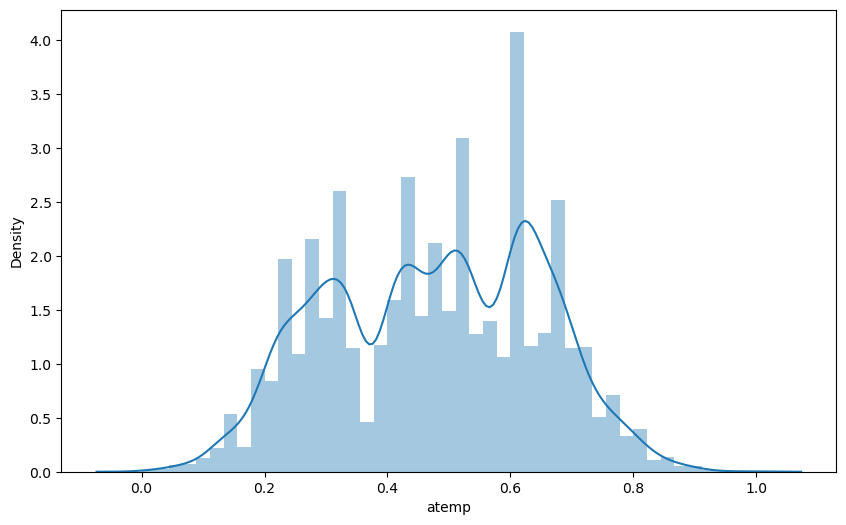

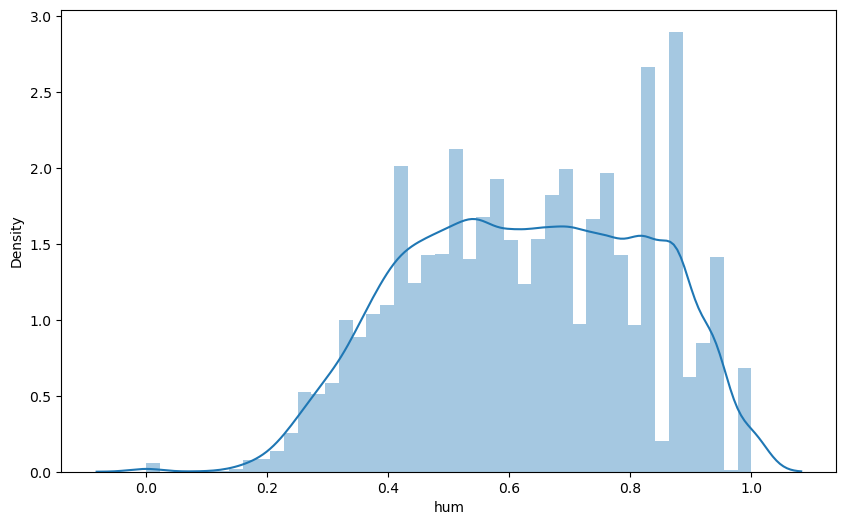

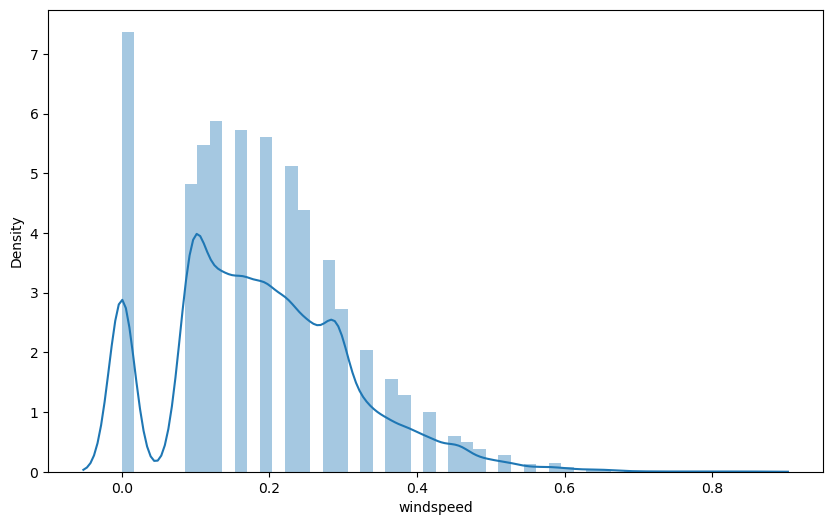

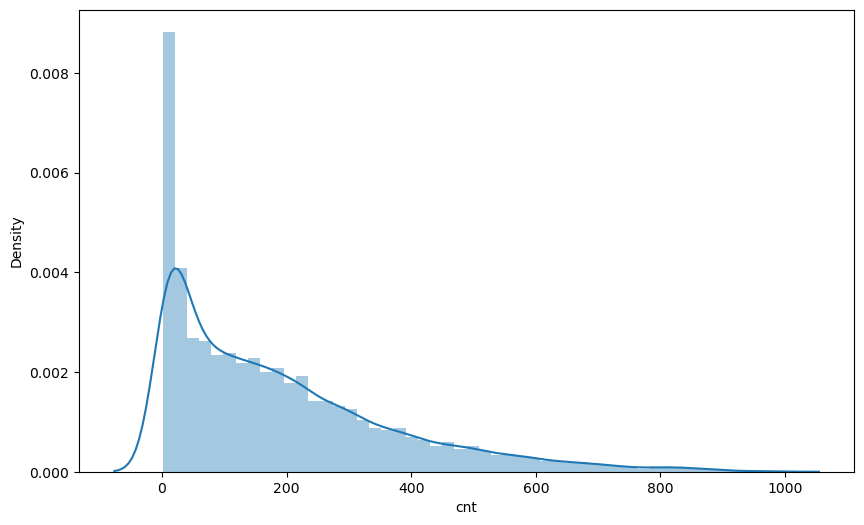

In [17]:
#Visual representation of the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bikes[col])
  plt.xlabel(col)
plt.show()

If temperatur is too high or low, usage drops. 
If humidity is too high or low, usage drops. 
High wind speeds means less rented bikes

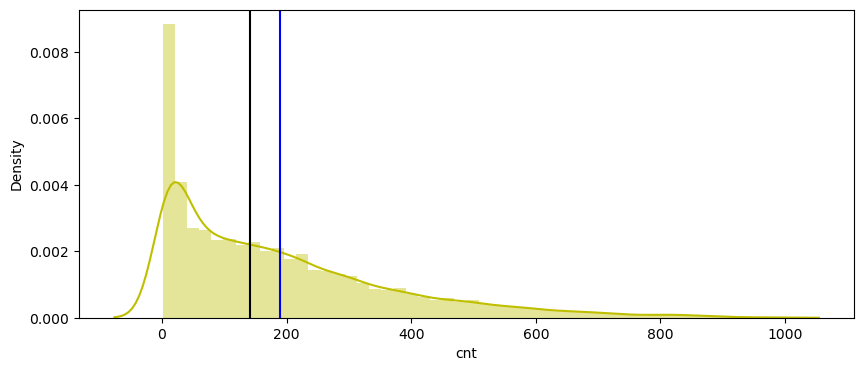

In [18]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,4))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bikes['cnt'],hist=True ,color="y")
ax.axvline(bikes['cnt'].mean(), color='blue')
ax.axvline(bikes['cnt'].median(), color='black')
plt.show()

In [19]:
print("Average bike rents: ", round(bikes['cnt'].mean()))
print("Median bike rents: ", round(bikes['cnt'].median()))

Average bike rents:  189
Median bike rents:  142


## Checking correlation between variables

In [20]:

x = bikes.iloc[:, :-1]
y = bikes['cnt']
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


<AxesSubplot:>

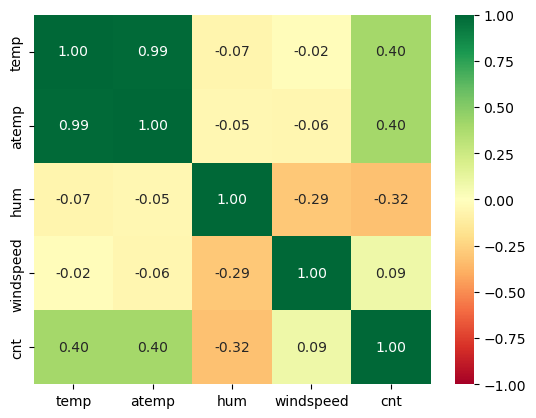

In [21]:
# Data visualisation 
# Building the correlation matrix

sns.heatmap(bikes.corr(), cmap='RdYlGn', vmin=-1, vmax=1, fmt='.2f', annot=True)

***From the correlation matrix we can see:***

***Following attributes positively affect bike rents:***
 * temperature
 * feeling temperature
 * windspeed
 
***Following attributes negatively affect bike rents:***
 * humidity
        
It is also clear the temp and feeling temperature are very similiar shown by the high correlation between the two.Therefor we can drop one of them without affecting our results.

In [22]:
bikes = bikes.drop(['atemp'], axis=1)

In [23]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  cnt         17379 non-null  int64   
dtypes: category(8), float64(3), int64(1)
memory usage: 681.2 KB


As we are now going on to linear regression, let's change back the category to work with the data.

In [24]:
#Change the catagory column into int64 column
cols=['season','yr','mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cols:
  bikes[col]=bikes[col].astype('int64')

In [25]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


# Model training

In [26]:
#assign values to x and y
x = bikes.iloc[:, :-1]
y = bikes['cnt']
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [27]:
x.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0


In [28]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [29]:
#split data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
# Fitting Multiple Linear Regression to testing module
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
#check the coefficeint
regressor.coef_

array([ 2.07609896e+01,  8.27461549e+01,  8.48056443e-02,  7.69378911e+00,
       -2.50690763e+01,  1.66314373e+00,  3.77381039e+00, -3.87866879e+00,
        2.79087033e+02, -1.97635317e+02,  2.40063725e+01])

In [32]:
#get the X_train and X-test value
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

In [33]:
# Evaluting the model
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)

MSE : 20321.846671984007
RMSE : 142.55471466066638
MAE : 106.65222654816463
R2 : 0.387931670688887


A r2 score of 0.38 means this model so far is basically useless even on the train data and won't get a good prediction in over 60% of cases. 

In [34]:
# saving the results to display later
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [35]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)


MSE : 19442.58088655218
RMSE : 139.43665546244353
MAE : 104.97954256444912
R2 : 0.3859994212622866


A similiar result for the test data. Problem so far likely too complex.

In [36]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3)
       }
test_df=pd.DataFrame(dict2,index=[1])

# Attempt 2 to improve the result

Result 1 is disappointing. After some research I found out that for machine learning it can be beneficial to split up categorial attributes like month or hour in our case in something like this using one hot encoding:

| month_1 | month_2 | month_3 | month_4 | month_5 | month_6 | month_7 | month_8 | month_9 | month_10 | month_11 | month_12 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |

Let's test if this does make a difference.

In [38]:
#Change the int64 column into catagory column
cols=['season','yr','mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cols:
  bikes[col]=bikes[col].astype('category')

In [39]:
#Assign all catagoriacla features to a variable
categorical_features=list(bikes.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [40]:
#creat a copy
bikes_copy = bikes

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bikes_copy = one_hot_encoding(bikes_copy, col)
bikes_copy.head() 

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,0.0,16,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.80,0.0,40,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.80,0.0,32,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.75,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.75,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Let's run the training

In [41]:
#assign values to x and y
x = bikes_copy.iloc[:, :-1]
y = bikes_copy['cnt']

#split data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fitting Multiple Linear Regression to testing module
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [42]:
#check the coefficeint
regressor.coef_

array([-3.80880931e-14,  4.81059637e-13, -7.96480937e-14,  1.00000000e+00,
        1.37102786e-14,  5.05315733e-14,  4.00145818e-14, -4.17309416e-15,
       -4.43661086e-14, -3.09477650e-14, -1.65815170e-14, -2.61010831e-15,
        1.54395539e-14,  1.66142124e-14, -7.02728349e-15, -8.15348494e-15,
        2.78930525e-14, -3.99650473e-16, -2.45067367e-14,  3.42914174e-15,
        5.92633039e-15,  5.08637186e-15,  8.25161879e-15,  8.44799491e-15,
        7.82952533e-15,  1.21070959e-14,  1.36382333e-14,  6.72807079e-15,
        2.11336245e-15, -9.20294521e-16, -3.26453274e-15, -4.23931181e-15,
       -4.59069496e-15, -5.65908133e-15, -5.02934283e-15,  1.66842451e-15,
        2.83728661e-14,  9.67758859e-16,  2.12446705e-15,  2.33689953e-15,
        3.23241325e-15,  1.86916455e-15, -1.13493741e-14, -5.85289602e-15,
       -1.03256975e-14, -7.99488649e-15, -5.33000564e-16,  6.97930754e-15,
       -8.04820891e-15, -6.38656066e-15,  5.90821066e-15, -4.17141365e-15])

In [43]:
#get the X_train and X-test value
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

In [44]:
# Evaluting the model from training
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)

MSE : 1.307235196780645e-26
RMSE : 1.143343866376448e-13
MAE : 9.354723394216386e-14
R2 : 1.0


A R2 of 1 basically means the model is perfect. Since this number is the result of train data, it could still mean that the model is overfitted to the training data.

In [45]:
# evaluting the model for testing
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)

MSE : 1.305144439219113e-26
RMSE : 1.142429183459138e-13
MAE : 9.363830513941779e-14
R2 : 1.0


Also perfect score. No overfitting, the model is good to use. Let's visualize the results:

In [54]:
bikes_an = bikes_copy.drop(['cnt'], axis=1)

In [55]:
for col, coef in zip(bikes_an.columns, regressor.coef_):
    print("Coeffiencet of", col, "is:", coef)

Coeffiencet of temp is: -3.8088093053047016e-14
Coeffiencet of hum is: 4.810596365700803e-13
Coeffiencet of windspeed is: -7.964809367599912e-14
Coeffiencet of season_2 is: 0.9999999999999999
Coeffiencet of season_3 is: 1.3710278572165446e-14
Coeffiencet of season_4 is: 5.053157328335778e-14
Coeffiencet of yr_1 is: 4.001458181728673e-14
Coeffiencet of mnth_2 is: -4.1730941618967066e-15
Coeffiencet of mnth_3 is: -4.436610855172024e-14
Coeffiencet of mnth_4 is: -3.094776496702367e-14
Coeffiencet of mnth_5 is: -1.6581516975450183e-14
Coeffiencet of mnth_6 is: -2.6101083100416034e-15
Coeffiencet of mnth_7 is: 1.5439553932225514e-14
Coeffiencet of mnth_8 is: 1.66142124472142e-14
Coeffiencet of mnth_9 is: -7.027283486019109e-15
Coeffiencet of mnth_10 is: -8.15348494016127e-15
Coeffiencet of mnth_11 is: 2.7893052451100075e-14
Coeffiencet of mnth_12 is: -3.99650473305313e-16
Coeffiencet of hr_1 is: -2.4506736700721787e-14
Coeffiencet of hr_2 is: 3.4291417361914656e-15
Coeffiencet of hr_3 is: 5

# Conclusion:

Using linear regression and basic preprocessing of Data, we now have an almost perfectly model to predict bike rentals